In [1]:
import pandas as pd

filepath_dict={'amazon': '/Users/amy/Downloads/amazon_cells_labelled.txt'
               }
df_list=[]

for source,filepath in filepath_dict.items():
    df=pd.read_csv(filepath, names=['sentence','label'], sep='\t')
    df['source']=source
    df_list.append(df)
    
df=pd.concat(df_list)
print(df.iloc[0])


sentence    So there is no way for me to plug it in here i...
label                                                       0
source                                                 amazon
Name: 0, dtype: object


In [2]:
df_amazon=df[df['source']=='amazon']

In [3]:
df_amazon.head(10)

,sentence,label,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [4]:
#lower case
df_amazon['sentence']=df_amazon['sentence'].str.lower()

In [5]:
df_amazon.head(10)

,sentence,label,source
0,so there is no way for me to plug it in here i...,0,amazon
1,"good case, excellent value.",1,amazon
2,great for the jawbone.,1,amazon
3,tied to charger for conversations lasting more...,0,amazon
4,the mic is great.,1,amazon
5,i have to jiggle the plug to get it to line up...,0,amazon
6,if you have several dozen or several hundred c...,0,amazon
7,if you are razr owner...you must have this!,1,amazon
8,"needless to say, i wasted my money.",0,amazon
9,what a waste of money and time!.,0,amazon


In [6]:
# remove punctuations and special characters
df_amazon['sentence']=df_amazon['sentence'].str.replace("[^\w\s]",'')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [7]:
df_amazon.head(10)

,sentence,label,source
0,so there is no way for me to plug it in here i...,0,amazon
1,good case excellent value,1,amazon
2,great for the jawbone,1,amazon
3,tied to charger for conversations lasting more...,0,amazon
4,the mic is great,1,amazon
5,i have to jiggle the plug to get it to line up...,0,amazon
6,if you have several dozen or several hundred c...,0,amazon
7,if you are razr owneryou must have this,1,amazon
8,needless to say i wasted my money,0,amazon
9,what a waste of money and time,0,amazon


In [8]:
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
#print(stopwords.words('english'))

lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
stop_words=stopwords.words('english')

def custom_tokenize(text,stopwords):
    text=str(text).split()
    #text =[t for t in text if t not in stopwords]
    text =[stemmer.stem(lemmatizer.lemmatize(t)) for t in text if t not in stopwords and len(t)>2]
    text=" ".join(text[0:])
    return(text)

[nltk_data] Downloading package stopwords to /Users/amy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
stop_words=stopwords.words('english')

In [10]:
#print(stop_words)

In [11]:
### combine all three above
def custom_tokenize(text,stopwords):
    text=str(text).split()
    #text =[t for t in text if t not in stopwords]
    text =[stemmer.stem(lemmatizer.lemmatize(t)) for t in text if t not in stopwords and len(t)>2]
    text=" ".join(text[0:])
    return(text)

In [12]:
### no stemming
def custom_tokenize(text,stopwords):
    text=str(text).split()
    #text =[t for t in text if t not in stopwords]
    text =[lemmatizer.lemmatize(t) for t in text if t not in stopwords and len(t)>2]
    text=" ".join(text[0:])
    return(text)

In [13]:
### no stemming and no lamma
def custom_tokenize(text,stopwords):
    text=str(text).split()
    #text =[t for t in text if t not in stopwords]
    text =[t for t in text if t not in stopwords and len(t)>2]
    text=" ".join(text[0:])
    return(text)

In [15]:
df_amazon['sentence_clean']=df_amazon.sentence.apply(lambda x: custom_tokenize(x,stop_words))

In [16]:
df_amazon.head(10)

,sentence,label,source,sentence_clean
0,so there is no way for me to plug it in here i...,0,amazon,way plug unless converter
1,good case excellent value,1,amazon,good case excellent value
2,great for the jawbone,1,amazon,great jawbone
3,tied to charger for conversations lasting more...,0,amazon,tied charger conversations lasting minutesmajo...
4,the mic is great,1,amazon,mic great
5,i have to jiggle the plug to get it to line up...,0,amazon,jiggle plug get line right get decent volume
6,if you have several dozen or several hundred c...,0,amazon,several dozen several hundred contacts imagine...
7,if you are razr owneryou must have this,1,amazon,razr owneryou must
8,needless to say i wasted my money,0,amazon,needless say wasted money
9,what a waste of money and time,0,amazon,waste money time


In [34]:
from sklearn.model_selection import train_test_split
sentences=df_amazon['sentence'].values
y=df_amazon['label'].values
sentences_train, sentences_test, y_train, y_test=train_test_split(sentences,y,test_size=0.25,random_state=323)

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(#stop_words='english',
                   token_pattern=r'\w{2,}', # only keeps the words with 2 letters or more
                   max_features=2000,
                   ngram_range=(1,3), # unigram, bigrams and trigrams
                   norm='l2') # not important
vec.fit(sentences_train)
tfidf_features=vec.get_feature_names()
#tfidf_features

x_train=vec.transform(sentences_train)
x_test=vec.transform(sentences_test)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
x_train=vectorizer.transform(sentences_train)
x_test=vectorizer.transform(sentences_test)
x_train

<750x1583 sparse matrix of type '<class 'numpy.int64'>'
	with 6724 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(#stop_words='english',
                   token_pattern=r'\w{2,}', # only keeps the words with 2 letters or more
                   max_features=2000,
                   ngram_range=(1,3), # unigram, bigrams and trigrams
                   norm='l2') # not important
vec.fit(sentences_train)
tfidf_features=vec.get_feature_names()
#tfidf_features

In [37]:
len(tfidf_features)

2000

In [38]:
x_train=vec.transform(sentences_train)
x_test=vec.transform(sentences_test)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train,y_train)
predict_lr = lr.predict(x_test)
score = lr.score(x_test,y_test)
result_lr = pd.DataFrame({'Predict':predict_lr,'actual':y_test})
print(f'Accuracy: {score}')

Accuracy: 0.812


In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report #commonly used
from sklearn.metrics import confusion_matrix #also very popular
clr = classification_report(y_test,predict_lr)
com = confusion_matrix(y_test,predict_lr)
print(clr)
print("Confusion_matrix")
print(com)


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       129
           1       0.82      0.78      0.80       121

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250

Confusion_matrix
[[109  20]
 [ 27  94]]


In [26]:


for source in df['source'].unique():
    df_source = df[df['source']==source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    sentences_train,sentences_test,y_train,y_test = train_test_split(sentences,y,test_size=0.25,random_state=323)
    
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    x_train=vectorizer.transform(sentences_train)
    x_test=vectorizer.transform(sentences_test)
    
    
    classifier=LogisticRegression()
    classifier.fit(x_train,y_train)
    score=classifier.score(x_test, y_test)
    print('Accuracy: for {} data: {:.4f}'.format(source, score))
    

Accuracy: for amazon data: 0.8120


In [39]:
import sklearn
import sklearn.ensemble
#Acuuracy
from sklearn.metrics import classification_report,confusion_matrix
rf=sklearn.ensemble.RandomForestClassifier(n_estimators=500, random_state=323)
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
pred_proba=rf.predict_proba(x_test)
confusionm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))
print("Confusion_matrix")
print(confusionm)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       129
           1       0.80      0.74      0.77       121

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250

Confusion_matrix
[[107  22]
 [ 32  89]]


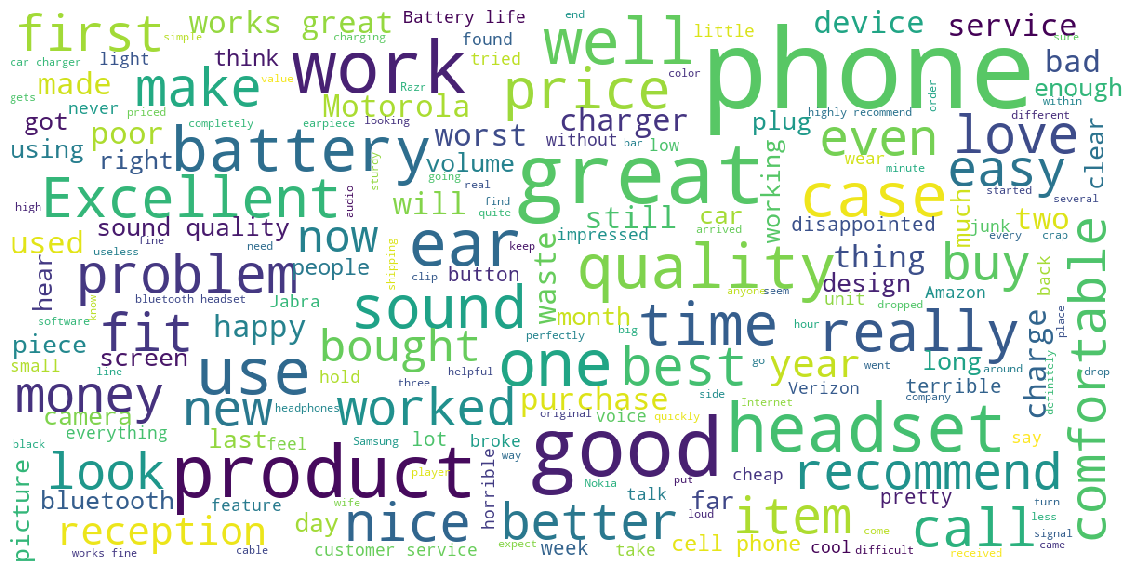

In [29]:
#sudo pip3 install matplotlib
#sudo pip3 install wordcloud
#sudo apt-get install python3-tk

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(sentences)

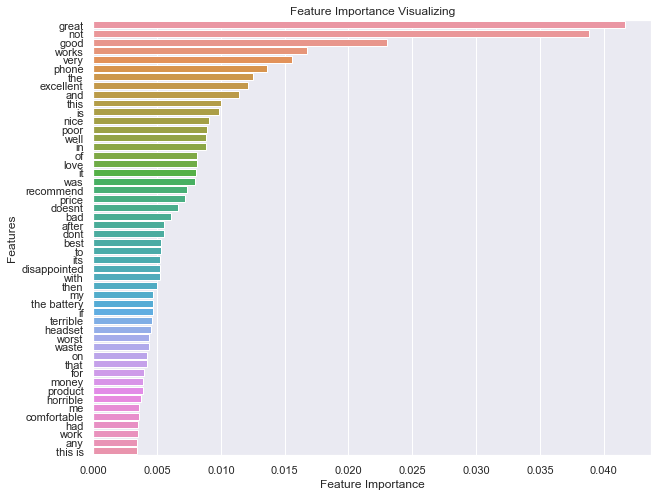

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance=pd.Series(rf.feature_importances_,index=tfidf_features).sort_values(ascending=False)
top_features=feature_importance.nlargest(50)
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x=top_features,y=top_features.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Visualizing")
plt.show()

### pip install xgboost

In [46]:
import xgboost as xgb
mdl=xgb.XGBClassifier(learning_rate=0.05, n_estimators=500, max_depth=3,subsample=0.8, objective='binary:logistic',monotone_constraints="1", nthread=-1)
mdl.fit(x_train, y_train)
mdl

### learning_rate smaller usually better 0.01-0.1
### n_estimators 500-1000,2000
### nthread: how many cores in cpu, -1 use them all. 


[19:00:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='1',
              n_estimators=500, n_jobs=4, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
pred=mdl.predict(x_test)
pred_proba=mdl.predict_proba(x_test)
confusionmat = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))
print("Confusion_matrix")
print(confusionmat)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       129
           1       0.80      0.67      0.73       121

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.77      0.76      0.76       250

Confusion_matrix
[[109  20]
 [ 40  81]]


In [23]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words=list(sent_to_words(sentences))
print(data_words[:1])

[['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']]


In [24]:
bigram=gensim.models.Phrases(data_words, min_count=1, threshold=2)
trigram=gensim.models.Phrases(bigram[data_words], threshold=1)

bigram_mod=gensim.models.phrases.Phraser(bigram)
trigram_mod=gensim.models.phrases.Phraser(trigram)


print(trigram_mod[bigram_mod[data_words[0]]])


['so', 'there_is', 'no', 'way', 'for_me', 'to_plug', 'it', 'in', 'here', 'in_the', 'us', 'unless', 'go', 'by', 'converter']


In [25]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


#form grams
data_words_bigrams=make_trigrams(data_words)

# create dictionary
id2word=gensim.corpora.Dictionary(data_words_bigrams)

# create corpus
texts=data_words_bigrams


#term document frequency

corpus=[id2word.doc2bow(text) for text in texts]


#view

print(corpus[:1])


print(id2word[0])


lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                         id2word=id2word,
                                         num_topics=9,#adjust this one for number of topics
                                         update_every=1,
                                         chunksize=100,
                                         passes=30,
                                         alpha='auto',
                                         per_word_topics=True)

from pprint import pprint
pprint(lda_model.print_topics())

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]
by
[(0,
  '0.078*"and" + 0.032*"the" + 0.026*"this" + 0.024*"phone" + 0.024*"was" + '
  '0.024*"my" + 0.019*"to" + 0.018*"on" + 0.017*"in" + 0.017*"good"'),
 (1,
  '0.036*"for" + 0.033*"the_phone" + 0.023*"as" + 0.021*"work" + 0.019*"too" + '
  '0.019*"or" + 0.014*"it" + 0.013*"had_to" + 0.012*"the_worst" + '
  '0.011*"people"'),
 (2,
  '0.029*"its" + 0.019*"it_is" + 0.018*"time" + 0.016*"well" + 0.015*"be" + '
  '0.014*"this_phone" + 0.014*"at" + 0.014*"two" + 0.012*"case" + '
  '0.009*"poor"'),
 (3,
  '0.036*"the" + 0.035*"is" + 0.026*"and" + 0.025*"of" + 0.023*"that" + '
  '0.020*"use" + 0.019*"on_the" + 0.016*"headset" + 0.010*"of_the" + '
  '0.010*"the_battery"'),
 (4,
  '0.026*"does_not" + 0.022*"this_is" + 0.019*"very" + 0.019*"phone" + '
  '0.015*"new" + 0.014*"to_use" + 0.011*"buy" + 0.011*"bad" + 0.011*"motorola" '
  '+ 0.010*"charge"'),
 (5,
  '0.02

In [31]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [32]:
import matplotlib.colors as mcolors
from wordcloud import WordCloud
cols=[color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud=WordCloud(background_color='white',
               width=2500,
               height=1800,
               max_words=20,
               color_func=lambda *args, **kwargs:cols[i],
               prefer_horizontal=1.0)

In [33]:
topics=lda_model.show_topics(formatted=False, num_topics=20, num_words=15)

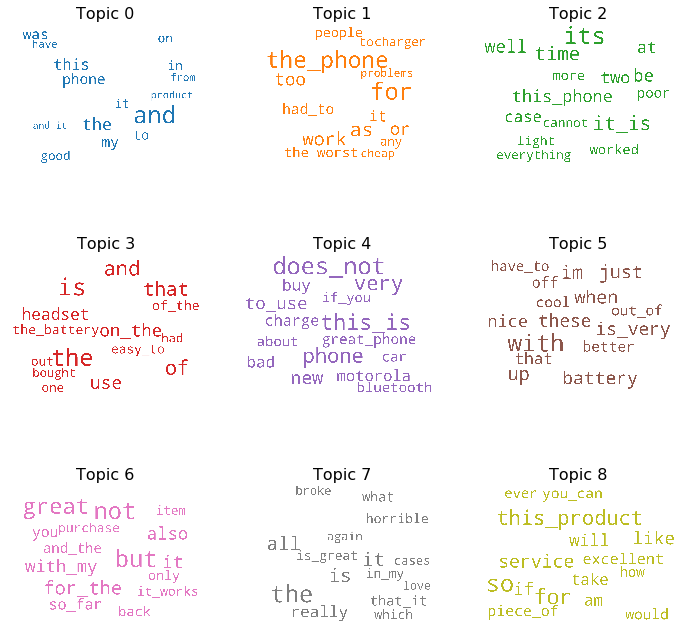

In [37]:
import matplotlib.pyplot as plt
fig, axes=plt.subplots(3, 3, figsize=(12,12), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words=dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic '+ str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

In [45]:
# how to block some warnings
import warnings
warnings.filterwarnings("ignore")